In [ ]:
# 題：製程參數優化
# 1. 定義目標函數
# 我們希望最大化的生產速率函數，並以此作為優化目標。假設此函數取決於溫度 (x[0]) 和壓力 (x[1]) 參數。

import numpy as np

# 定義生產速率函數
def production_rate(x):
    # x[0]: 運行溫度 T, x[1]: 壓力 P
    return -(2*x[0] * np.log(x[1]) - 0.01 * x[0]**2) # 假定設計，用負號使最小化過程達到最大化效果。


In [38]:
# 2. 設定限制條件
# 定義溫度和壓力的範圍，將其設定為約束條件。

from scipy.optimize import minimize

# 限制條件（如溫度範圍和壓力範圍）
constraints = (
    {'type': 'ineq', 'fun': lambda x: x[0] - 200},  # 溫度下限
    {'type': 'ineq', 'fun': lambda x: 300 - x[0]},  # 溫度上限
    {'type': 'ineq', 'fun': lambda x: x[1] - 1},    # 壓力下限
    {'type': 'ineq', 'fun': lambda x: 10 - x[1]}    # 壓力上限
)
# ineq 用於告訴優化器，我們設置了一個「不等式約束」，其條件是某些表達式的值必須 大於或等於 0。
# fun 用來定義不等式條件的函數。x[0] - 200 >= 0，即 x[0] >= 200。


In [39]:
# 3. 設置初始值並執行優化
# 用 minimize 函數進行優化，尋找最佳的溫度和壓力組合以達到最大生產速率。

# 初始值設定
initial_values = [250, 5]  # 假設溫度 250, 壓力 5
# 加入更多優化選項，例如收斂容忍度 (tol) 或最大迭代次數 (maxiter) 等
options = {'disp': True, 'maxiter': 1000, 'tol': 1e-6} ##
# 使用 SciPy 的 minimize 進行優化
result = minimize(production_rate, initial_values, constraints=constraints, options=options) ##
# minimize 預設會自動選擇適當的算法，最終找到一組參數組合，使目標函數值達到最低，並且符合設定的約束條件。

# 結果輸出
print("最佳溫度:", result.x[0])
print("最佳壓力:", result.x[1])
print("最大化生產速率:", -result.fun) # 由於原函數是負數，因此此處需取負數 ##


Optimization terminated successfully    (Exit mode 0)
            Current function value: -530.1898110478484
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 6
最佳溫度: 230.258517551871
最佳壓力: 10.0000000000002
最大化生產速率: 530.1898110478484


C:\Users\User\AppData\Local\Temp\ipykernel_31064\2244575310.py:9: OptimizeWarning: Unknown solver options: tol
  result = minimize(production_rate, initial_values, constraints=constraints, options=options) ##


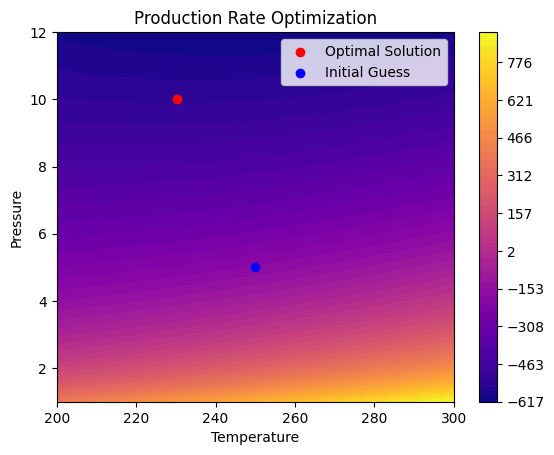

In [ ]:
# 可視化：繪製生產速率的等高線圖

import matplotlib.pyplot as plt

temperature_range = np.linspace(200, 300, 100)  # 設定溫度範圍
pressure_range = np.linspace(1, 12, 100)  # 設定壓力範圍
T, P = np.meshgrid(temperature_range, pressure_range)  # 生成網格
Z = -(2*T * np.log(P) - 0.01 * T**2)  # 計算對應的生產速率

# 設置等高線的範圍
levels = np.linspace(Z.min(), Z.max(), 50)  # 設置從最小到最大(生產速率)範圍的等高線，和 50 個等距的數值（即顏色映射的 50 個層級）
# 繪製等高線圖
plt.contourf(T, P, Z, levels=levels, cmap='plasma')  # 使用 'plasma' 顏色映射
plt.colorbar()  # 顯示顏色條

# 標註初始猜測點（優化前）
plt.scatter(initial_values[0], initial_values[1], color='blue', label='Initial Guess') ##
# 標註最佳解的點
plt.scatter(result.x[0], result.x[1], color='red', label='Optimal Solution')

# 添加標題和標籤
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend() # 圖例
plt.title('Production Rate Optimization')
plt.show()

In [42]:
print("Z 範圍:", Z.min(), Z.max())

Z 範圍: -530.1897912266423 900.0
